# PROJECT DETAILS

Project Steps Overview
The tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

---

# INTRODUCTION

The dataset i will be dealing with is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

The WeRateDog is a Twitter archive containing over 5000 tweets, which have been filtered to create the enhanced archive that forms the basis of this analysis. 

## THE GOAL

The goal of this project is to wrangle the data, gather, assess, clean and tidy the dataset in other to provide meaningful and intelligent analyses and visualizations.

---

## INSTALL NECCESSARY LIBRARIES

In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

In [5]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


## IMPORT ALL NECCESSARY LIBRARIES

In [6]:
import pandas as pd
from pandas import read_html
import html5lib
import numpy as np
import requests 
import tweepy
import datetime
import re
import os
import json
import time
import warnings

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns

print("Done")

Done


---

# Step 1: Gathering Data

1. Twitter archive file
2. Tweet image predictions
3. Twitter API & JSON

## 1. Twitter Archieve

This data was downloaded manually form the udacity server

#### Load data as dftwitter

In [7]:
# Load the twitter archieve file into a DataFrame
dftwitter = pd.read_csv('twitter-archive-enhanced.csv')

In [8]:
dftwitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
dftwitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
dftwitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
dftwitter.shape

(2356, 17)

In [12]:
dftwitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

---

## 2. Tweet Image Prediction

This file is hosted on Udacity servers and is downloaded programmatical using the request library and the URL below:
"https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [13]:
# Downloading URL programatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response

<Response [200]>

HTTP status code 200 indicates the request has succeeded

In [14]:
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [15]:
#Read TSV file
dfimage = pd.read_csv('image-predictions.tsv', sep='\t' )

In [16]:
ls * tsv

 Volume in drive C has no label.
 Volume Serial Number is D085-624E

 Directory of C:\Users\derae\Data Analysis\Project 2_2


 Directory of C:\Users\derae\Data Analysis\Project 2_2

09/23/2022  11:38 AM    <DIR>          .
09/23/2022  11:38 AM    <DIR>          ..
09/23/2022  11:36 AM    <DIR>          .ipynb_checkpoints
09/23/2022  11:38 AM           335,079 image-predictions.tsv
09/23/2022  11:38 AM           609,270 Project 2_2.ipynb
09/17/2022  09:03 AM           915,692 twitter-archive-enhanced.csv
               3 File(s)      1,860,041 bytes
               3 Dir(s)  405,230,379,008 bytes free


In [17]:
dfimage.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
dfimage.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [19]:
dfimage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
dfimage.shape

(2075, 12)

In [21]:
dfimage.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [24]:
dfimage.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

---

## 3. Twitter API & JSON

This data was gotten from twitter by querying the Twitter API using Python's Tweepy library to get the entire set of JSON data for each of the tweets in the WeRateDogs Twitter archive.

### Twitter API keys, Secrets, and Tokens 

In [25]:
CONSUMER_KEY = 'HIDDEN'
CONSUMER_SECRET = 'HIDDEN'
OAUTH_TOKEN = 'HIDDEN'
OAUTH_TOKEN_SECRET = 'HIDDEN'

In [26]:
# Create the Twitter API object and set rate limit params

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth)

I encounterd some challenges while carrying out this process so i had to use from the reasource already provided in Udacity server from the URL below:
'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'

In [27]:
# Downloading URL Programaticall
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
response

<Response [200]>

HTTP status code 200 indicates the request has succeeded

In [31]:
# Save HTML to file

json_list =[]
with open("tweet-json.txt",'r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        favorite_count = tweets['favorite_count']
        retweet_count = tweets['retweet_count']
        
        json_list.append({'tweet_id':tweet_id,
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                         })

In [32]:
dfjtweet = pd.DataFrame(json_list, columns = ['tweet_id','favorite_count','retweet_count'])

In [33]:
dfjtweet.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [34]:
dfjtweet.tail()

,tweet_id,favorite_count,retweet_count
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [31]:
dfjtweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [35]:
dfjtweet.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

---

# Step 2: Assessing data

In this section, i assembled all three data that i have gathered earlier both visually and programmatically

Here i am going to be Inspecting the detaset for two things:

- Data quality issues(i.e. content issues)
- Lack of tidiness (i.e. Structural issues).

## Visual Inspection

In [36]:
dftwitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [37]:
dfimage

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [38]:
dfjtweet

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


I also had to view the file from a text editor outside pandas for proper visualization

---

## Programatic Inspection

In [39]:
dftwitter.shape

(2356, 17)

In [40]:
dftwitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [41]:
dftwitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [42]:
dftwitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [43]:
dftwitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [44]:
# Check for duplicacy
dftwitter.duplicated().sum()

0

This shows clearly that we have no duplicated data

In [45]:
# View the sorces of data and their value count
dftwitter['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

This shows the data came from 4 sources and the first one "http://twitter.com/download/iphone" has the highest value count which is from the users iphone.

## rating_numerator and rating_denominator

In [49]:
dftwitter[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


- The max values are huge: 1776,170
- The minimum is 0 for both

In [51]:
dftwitter.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [52]:
sum(dftwitter.rating_denominator != 10)

23

### NOTE:

Many large numbers are multiples of 10 (2333)

When looking at some of those tweets we see that there is more than 1 dog in the photo.

Ignoring the retweets and replies we have the following list below

In [53]:
# display tweets that do NOT have denominator of 10,
# and are NOT replies and are NOT retweets
den_find = (dftwitter.rating_denominator != 10) & \
            dftwitter.in_reply_to_status_id.isna() & \
            dftwitter.retweeted_status_id.isna()

den_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
dftwitter[den_find][den_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,24,7
902,Why does this never happen at my front door......,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She ...",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #Final...,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45,50


In [55]:
sum(den_find)

17

## NOTE:

Ignoring the replies and retweets, there are 17 tweets with denominators that aren't 10.

## Rating_numerator

In [42]:
# Rating numerator vlaues
dftwitter.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [56]:
sum(dftwitter.rating_numerator >= 15)

28

## NOTES:

The output above shows ALL the rating_numerator values, showing a count of 28 tweets with numerator >= 15. Next, looking at ONLY those ratings with denominators = 10, the results are as follows:

In [58]:
df_tweets_den_10 = dftwitter[dftwitter.rating_denominator == 10]
df_tweets_den_10.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
666       1
420       2
182       1
75        2
27        1
26        1
17        1
15        2
14       54
13      351
12      558
11      463
10      461
9       156
8       102
7        54
6        32
5        37
4        15
3        19
2         9
1         8
0         2
Name: rating_numerator, dtype: int64

In [59]:
sum(df_tweets_den_10.rating_numerator >= 15)

12

## NOTES:

Looking ONLY at tweets that have denominators = 10, there are 12 with numerators >= 15. Picking 15 as the lower boundary because it's got just 2 counts, while 14 has a count of 54.

In [61]:
# display tweets with numerator >= 15 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
den_find = (dftwitter.rating_denominator == 10) & \
            (dftwitter.rating_numerator >= 15) & \
            dftwitter.in_reply_to_status_id.isna() & \
            dftwitter.retweeted_status_id.isna()

den_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
dftwitter[den_find][den_cols]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly...",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,778027034220126208,27,10
979,This is Atticus. He's quite simply America af....,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of ...,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood...,670842764863651840,420,10


In [63]:
# display tweets with numerator = 0 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
den_find = (dftwitter.rating_denominator == 10) & \
            (dftwitter.rating_numerator == 0) & \
            dftwitter.in_reply_to_status_id.isna() & \
            dftwitter.retweeted_status_id.isna()

den_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
dftwitter[den_find][den_cols]

,text,tweet_id,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plag...,835152434251116546,0,10


# Check for retweets
len(dftwitter[dftwitter.retweeted_status_id.isnull() == False])

## OBSERVATIONS

### QUALITY

1. Retweeted columns are not needed
2. in_reply_to_status_id and the in_reply_to_user_id not needed
3. The Dog Names are faulty
4. Tweets with missing data in expanded_urls (links to the tweet).
5. The rating denominator needs to be fixed
6. Timestamp column needs to be a datetime variable
    - The ID vatiable are sometimes integers and sometimes as floats
    - in_reply_to and retweeted_staus variables are numeric
    - retweets are present in the data
7. There are only 4 types of values in the source column, and they can be simplified by using the display string portion just before the final "<\a>":

    - Twitter for iPhone
    - Vine - Make a Scene
    - Twitter Web Client
    - TweetDeck

### STRUCTURE (TIDINESS)

1. All columns related to “retweets” will be empty (we're not interested in retweets)
2. All columns related to replies will be droped
3. There are 4 columns for dog stage

## NOTE:

### The quality and tidiness issues for the rest of the dataset are listed below

---

# Image Predictions

In [44]:
dfimage

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [45]:
dfimage.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [46]:
dfimage.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [47]:
dfimage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [48]:
dfimage.shape

(2075, 12)

In [49]:
sum(dfimage.duplicated())

0

No duplicate values

In [50]:
sum(dfimage.jpg_url.duplicated()==True)

66

In [51]:
dfimage['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [52]:
dfimage.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## OBSERVATIONS

8. Column names needs to be improved, There are underscores in p1, p2, p3 tweet_id are not categorical (string) 2075 tweet ids present

---

## JSON File

In [53]:
dfjtweet.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [54]:
dfjtweet.tail()

,tweet_id,favorite_count,retweet_count
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [55]:
dfjtweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [56]:
dfjtweet.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [57]:
sum(dfjtweet.duplicated()==True)

0

## OBSERVATIONS

9. Number of missing ID's

---

# Step 3: Cleaning data

## Lets prpare a working copy of each seperate dataset

dftwittercopy = dftwitter.copy()
dfimagecopy = dfimage.copy()
dfjtweetcopy = dfjtweet.copy()
print("Done")

## Twitter Archive

In [67]:
dftwittercopy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [68]:
dftwittercopy.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

## Quality archieve #1

There are retweets we’re only interested in “original tweets

## Quality archieve #2

There are reply tweets; we’re only interested in “original tweets

## Tidiness archieve #1

All columns related to retweets will be droped

## Tidiness archieve #2

All columns related to replies will be droped

## DEFINE 

* # Taking only Necessary Columns

## CODE

In [69]:
dftwittercopy = dftwitter[['tweet_id', 'timestamp', 'source', 'text',
                           'expanded_urls', 'rating_numerator',
                           'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

## TEST

In [98]:
dftwittercopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   dog_stage           2356 non-null   object             
 9   dog_breed           2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 184.2+ KB


In [99]:
dftwittercopy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'dog_breed'],
      dtype='object')

## Quality #3

## DEFINE

Check for odd names and change to None then change all None to dog

## CODE

In [73]:
dftwittercopy['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [76]:
nameFault = dftwittercopy[dftwittercopy.name.str.islower() == True]['name']

In [77]:
nameFault

22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

In [78]:
nameFault.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

This clearly dont look like dog names.

In [79]:
for x in nameFault:
    dftwittercopy.name.replace(x, 'None', inplace = True)

C:\Users\derae\AppData\Local\Temp\ipykernel_11208\2690337794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftwittercopy.name.replace(x, 'None', inplace = True)


In [81]:
dftwittercopy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooe

### I will like to replace the None to dog

In [83]:
dftwittercopy.name.replace('None', 'Dog', inplace = True)

C:\Users\derae\AppData\Local\Temp\ipykernel_11208\1034294891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftwittercopy.name.replace('None', 'Dog', inplace = True)


In [84]:
dftwittercopy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Dog', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey

## Quality archieve #5

## DEFINE

Assign 10 to rating denominator rating values and drop the  remaining

## CODE

In [85]:
dftwittercopy.rating_denominator = dftwittercopy['rating_denominator'] = 10

C:\Users\derae\AppData\Local\Temp\ipykernel_11208\3703148832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftwittercopy.rating_denominator = dftwittercopy['rating_denominator'] = 10


## TEST

In [86]:
dftwittercopy.rating_denominator.unique()

array([10], dtype=int64)

---

# Quality archieve #6

## DEFINE

Convert timestamp column to date

## CODE

In [88]:
dftwittercopy['timestamp'] = pd.to_datetime(dftwittercopy['timestamp'])

C:\Users\derae\AppData\Local\Temp\ipykernel_11208\2048826433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftwittercopy['timestamp'] = pd.to_datetime(dftwittercopy['timestamp'])


## TEST

In [89]:
dftwittercopy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## TIDINESS #3

## DEFINE

Merge the the stages to one

## CODE

In [91]:
def dog_breed(row):
    breed = []
    if row['doggo'] == 'doggo':
        breed.append('doggo')
    if row['floofer'] == 'floofer':
        breed.append('floofer')
    if row['pupper'] == 'pupper':
        breed.append('pupper')
    if row['puppo'] == 'puppo':
        breed.append('puppo')
        
    if not breed:
        return "None"
    else:
        return ','.join(breed)
    
dftwittercopy['dog_breed'] = dftwittercopy.apply(lambda row: dog_stage(row), axis = 1)

C:\Users\derae\AppData\Local\Temp\ipykernel_11208\2331116349.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftwittercopy['dog_breed'] = dftwittercopy.apply(lambda row: dog_stage(row), axis = 1)


In [92]:
#drop the columns
dftwittercopy.drop(["doggo", "floofer", "pupper", "puppo"], axis = 1, inplace = True)

C:\Users\derae\AppData\Local\Temp\ipykernel_11208\2918115175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftwittercopy.drop(["doggo", "floofer", "pupper", "puppo"], axis = 1, inplace = True)


## TEST

In [93]:
dftwittercopy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None


In [95]:
pd.value_counts(dftwittercopy['dog_breed'])

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_breed, dtype: int64

## Quality archieve #4

## DEFINE

Drop tweets with missing data in the expanded_urls

## CODE 

In [104]:
dftwittercopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   dog_stage           2356 non-null   object             
 9   dog_breed           2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 184.2+ KB


In [105]:
dftwittercopy = dftwittercopy[dftwittercopy.expanded_urls.notnull()]

## TEST

In [106]:
dftwittercopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   int64              
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   source              2297 non-null   object             
 3   text                2297 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2297 non-null   int64              
 6   rating_denominator  2297 non-null   int64              
 7   name                2297 non-null   object             
 8   dog_stage           2297 non-null   object             
 9   dog_breed           2297 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 197.4+ KB


## Quality archive #7

## DEFINE

## CODE

In [100]:
dftwittercopy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [102]:
dftwittercopy['source'] = dftwittercopy['source'].str.extract('^<a.+>(.+)</a>$')

C:\Users\derae\AppData\Local\Temp\ipykernel_11208\3281299431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftwittercopy['source'] = dftwittercopy['source'].str.extract('^<a.+>(.+)</a>$')


## TEST

In [103]:
dftwittercopy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## Image Predictions

## QUALITY #8

## DEFINE

Change the first letters of the name p1,p2,p3 columns

## CODE

In [72]:
dfimagecopy.p1 = dfimagecopy.p1.str.capitalize()
dfimagecopy.p2 = dfimagecopy.p2.str.capitalize()
dfimagecopy.p3 = dfimagecopy.p3.str.capitalize()

## TEST

In [73]:
dfimagecopy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Fix "_" and "-" by replacing with space in p1,p2 and p3 columns

In [74]:
dfimagecopy.p1 = dfimagecopy.p1.str.replace('_',' ')
dfimagecopy.p2 = dfimagecopy.p2.str.replace('_',' ')
dfimagecopy.p3 = dfimagecopy.p3.str.replace('_',' ')

dfimagecopy.p1 = dfimagecopy.p1.str.replace('-',' ')
dfimagecopy.p2 = dfimagecopy.p2.str.replace('-',' ')
dfimagecopy.p3 = dfimagecopy.p3.str.replace('-',' ')

In [75]:
dfimagecopy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# JSON File

## QUALITY #9

## DEFINE

set the tweet _id to string with astype()

## CODE

In [76]:
dfjtweetcopy['tweet_id'] = dfjtweetcopy['tweet_id'].astype('str')

In [77]:
dfjtweetcopy.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


- Renaming the column names. This will be of help when we wish to merge the data

In [78]:
dfjtweetcopy.rename(columns = {'favorite_count': 'likes', 'retweet_count': 'retweets'}, inplace = True)

## TEST

In [79]:
dfjtweetcopy.head()

,tweet_id,likes,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [80]:
dfjtweetcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2354 non-null   object
 1   likes     2354 non-null   int64 
 2   retweets  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [81]:
dfjtweetcopy.describe()

,likes,retweets
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


## DEFINE

- Change tweet_id from number to string for all data set. This will help when we will be merging the data. For consistency.

## CODE

In [82]:
# Change format type from number to string for all

dftwittercopy['tweet_id'] = dftwittercopy['tweet_id'].astype('str')
dfimagecopy['tweet_id'] = dfimagecopy['tweet_id'].astype('str')
dfjtweetcopy['tweet_id'] = dfjtweetcopy['tweet_id'].astype('str')
                                  

## TEST

In [83]:
type(dftwittercopy['tweet_id'].iloc[0])
type(dfimagecopy['tweet_id'].iloc[0])
type(dfjtweetcopy['tweet_id'].iloc[0])

str

---

# Step 4: Storing and Merging Data

In [84]:
dfmerge = pd.merge(dftwittercopy, dfimagecopy, on = ['tweet_id'], how = 'inner')
dfmerge = pd.merge(dfmerge, dfjtweetcopy, on = 'tweet_id', how = 'inner')

We have just combined all the data set into one frame

In [85]:
dfmerge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English springer,0.225770,True,German short haired pointer,0.175219,True,41048,9774


In [86]:
dfmerge.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,111,41
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,...,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,311,147
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,128,47
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,132,48
2072,666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666020888...,...,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True,2535,532


In [87]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     datetime64[ns, UTC]
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

### Value of Rating

In [88]:
dfmerge['rating'] = dfmerge['rating_numerator']/dfmerge['rating_denominator']

In [89]:
dfmerge.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,False,Bagel,0.085851,False,Banana,0.07611,False,39467,8853,1.3


Lets drop some unwanted columns in our new dataset

In [90]:
# Drop some unwanted columns
dfmerge.drop(['retweeted_status_id','retweeted_status_timestamp', 'retweeted_status_user_id'], axis = 1, inplace = True)

#Allow all columns and text to be shown
pd.set_option('display.max_columns', None)

In [92]:
dfmerge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467,8853,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,42908,8964,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English springer,0.225770,True,German short haired pointer,0.175219,True,41048,9774,1.2


In [93]:
dfmerge.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets,rating
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,111,41,0.5
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,311,147,0.6
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,128,47,0.9
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,132,48,0.7
2072,666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True,2535,532,0.8


## Data Storing

In [94]:
dfmerge.to_csv('twitter_archieve_master_new.csv', encoding = 'utf-8', index = False)

In [95]:
# Read our new data
dfwragled = pd.read_csv('twitter_archieve_master_new.csv')

In [96]:
dfwragled.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467,8853,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,42908,8964,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English springer,0.225770,True,German short haired pointer,0.175219,True,41048,9774,1.2


In [97]:
dfwragled.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets,rating
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,111,41,0.5
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,311,147,0.6
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,128,47,0.9
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,132,48,0.7
2072,666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True,2535,532,0.8


In [98]:
dfwragled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2073 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2073 non-null   object 
 4   source                 2073 non-null   object 
 5   text                   2073 non-null   object 
 6   expanded_urls          2073 non-null   object 
 7   rating_numerator       2073 non-null   int64  
 8   rating_denominator     2073 non-null   int64  
 9   name                   2073 non-null   object 
 10  dog_stage              2073 non-null   object 
 11  jpg_url                2073 non-null   object 
 12  img_num                2073 non-null   int64  
 13  p1                     2073 non-null   object 
 14  p1_conf                2073 non-null   float64
 15  p1_d

In [99]:
dfwragled.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,likes,retweets,rating
count,2.073000e+03,2.300000e+01,2.300000e+01,2073.000000,2073.0,2073.000000,2073.000000,2.073000e+03,2.073000e+03,2073.000000,2073.000000,2073.000000
mean,7.383634e+17,6.978112e+17,4.196984e+09,12.265798,10.0,1.203570,0.594532,1.346665e-01,6.034005e-02,8556.718283,2976.089243,1.226580
std,6.780118e+16,4.359384e+16,0.000000e+00,40.699924,0.0,0.561856,0.271234,1.006830e-01,5.092769e-02,12098.640994,5054.897526,4.069992
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,16.000000,0.000000
25%,6.764706e+17,6.732411e+17,4.196984e+09,10.000000,10.0,1.000000,0.364095,5.390140e-02,1.619920e-02,1674.000000,634.000000,1.000000
50%,7.119681e+17,6.757073e+17,4.196984e+09,11.000000,10.0,1.000000,0.588230,1.186220e-01,4.947150e-02,3864.000000,1408.000000,1.100000
75%,7.931959e+17,7.031489e+17,4.196984e+09,12.000000,10.0,1.000000,0.843911,1.955730e-01,9.193000e-02,10937.000000,3443.000000,1.200000
max,8.924206e+17,8.558181e+17,4.196984e+09,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000,177.600000


In [100]:
dfwragled.shape

(2073, 25)

---

# Step 5: Analyzing, and visualizing data

In [101]:
dfwragled.loc[dfwragled['rating']>2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets,rating
345,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,10,None,None,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West highland white terrier,0.872064,True,Kuvasz,0.059526,True,Samoyed,0.037400,True,13518,3716,8.4
415,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,10,Sam,None,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,Golden retriever,0.871342,True,Tibetan mastiff,0.036708,True,Labrador retriever,0.025823,True,5927,1655,2.4
558,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian cat,0.122978,False,Chow,0.102654,True,20296,7069,7.5
614,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,Clumber,0.946718,True,Cocker spaniel,0.015950,True,Lhasa,0.006519,True,7320,1885,2.7
734,758467244762497024,NaN,NaN,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,10,None,None,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador retriever,0.436377,True,Chihuahua,0.113956,True,American staffordshire terrier,0.099689,True,5316,2539,16.5
802,749981277374128128,NaN,NaN,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,Bow tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,5569,2772,177.6
924,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,10,None,None,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,Lakeside,0.501767,False,Breakwater,0.051351,False,King penguin,0.049444,False,4196,1434,20.4
1001,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,10,Bluebert,None,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian husky,0.396495,True,Malamute,0.317053,True,Eskimo dog,0.273419,True,2574,247,5.0
1022,713900603437621249,NaN,NaN,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,10,None,None,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,Golden retriever,0.371816,True,Cocker spaniel,0.177413,True,Irish setter,0.092725,True,3062,829,9.9
1047,710658690886586372,NaN,NaN,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,10,None,None,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,Soft coated wheaten terrier,0.948617,True,Dandie dinmont,0.018664,True,Cairn,0.015943,True,2529,636,8.0


In [102]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [103]:
# New issues Detected

In [104]:
#Remove links and apply to text
def remove_link(x):
    http_pos =x.find("http")
    if http_pos == -1:
        x = x
    else:
        x = x[:http_pos - 1]
    return x

In [105]:
dfwragled.text = dfwragled.text.apply(remove_link)

In [106]:
for row in dfwragled.text[:5]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek


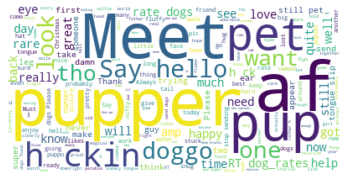

In [107]:
# Word Cloud of text 
#Collect all texts from column 'text'
text1 = " ".join(review for review in dfwragled.text)

#Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["puppy", "Bruno", "dog", "good", "boy", "cool"])

#Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text1)

# Display the generated image:
# the matplotlib way
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Retweets and Favorites Plot')

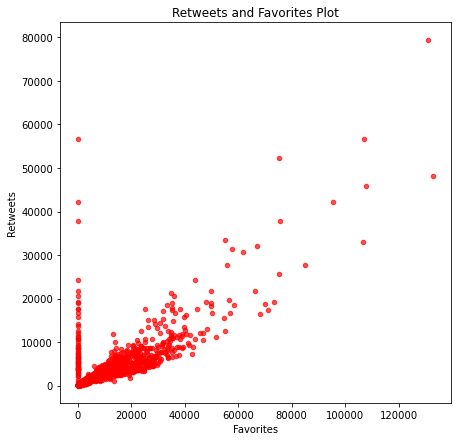

In [108]:
dfwragled.plot(kind = "scatter", x = "likes", y = "retweets", alpha = 0.7, figsize = (7,7), color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and Favorites Plot')

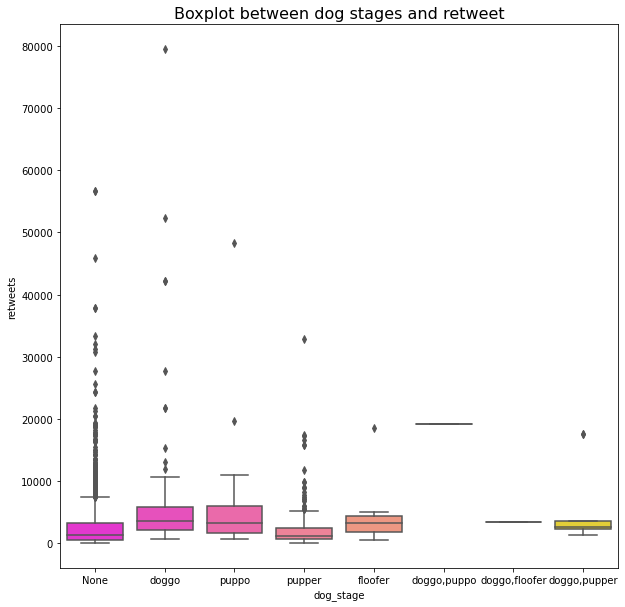

In [109]:
plt.figure(figsize = (10, 10))
g = sns.boxplot(x = 'dog_stage', y ='retweets', data = dfwragled, palette = 'spring')
g.axes.set_title('Boxplot between dog stages and retweet', fontsize = 16);

This actually shows that most of the dogs are in Puppo category but highest retweets are about doggo category

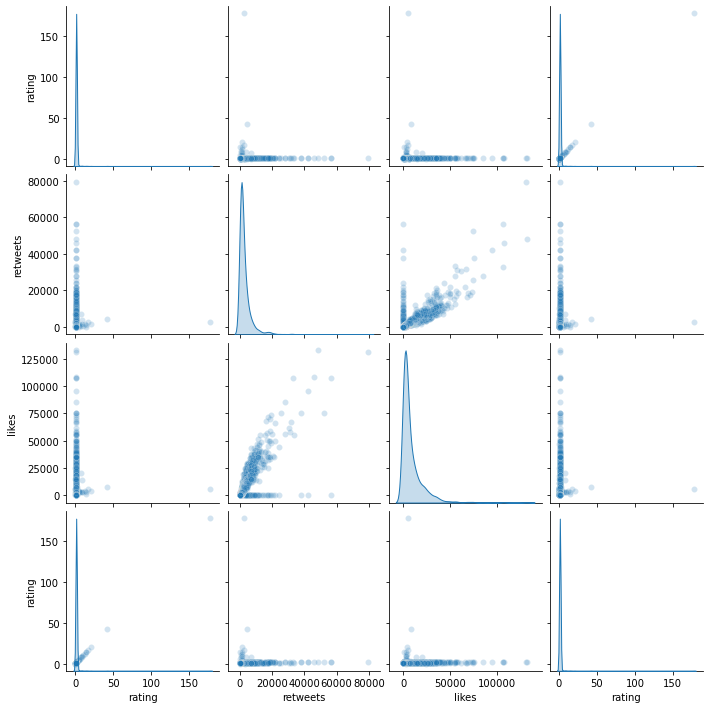

In [110]:
sns.pairplot(dfwragled,
             vars = ['rating', 'retweets', 'likes', 'rating'],
             diag_kind = 'kde', plot_kws = {'alpha': 0.2});

What dog stage have the highest overall likes

In [111]:
likes_breed = dfwragled[dfwragled.dog_stage != 'None']
likes_breed = likes_breed.groupby(['dog_stage'])
likes_breed = likes_breed['likes'].sum()
likes_breed = likes_breed.sort_values(ascending = False)
top10_likes_breeds = likes_breed.head(10)
top10_likes_breeds

dog_stage
pupper           1461141
doggo            1219452
puppo             474806
doggo,pupper      112798
floofer            92442
doggo,puppo        47844
doggo,floofer      17169
Name: likes, dtype: int64

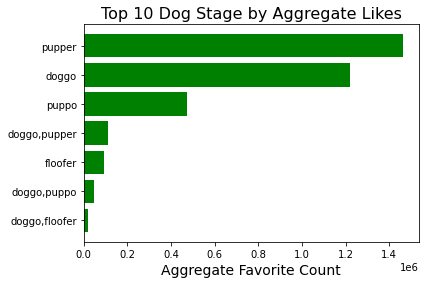

In [112]:
plt.barh(top10_likes_breeds.index, top10_likes_breeds, color = 'g')

plt.xlabel('Aggregate Favorite Count', fontsize = 14)

# plt.ylabel('Dog Breed', fontsize = 12)
plt.title('Top 10 Dog Stage by Aggregate Likes', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

Pupper has the highest likes